# Using Random Forest for Regression Test

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor


np.random.seed(483)

In [8]:
Diabetes = pd.read_csv('Diabetes.csv')

# Data Exploration and Data Cleaning

In [9]:
Diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [10]:
cleanup_class= {"class": {"tested_positive": 1, "tested_negative": 0}}

In [11]:
Diabetes.replace(cleanup_class, inplace=True)
Diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Replacing 0 values with NaN

Diabetes[['plas','pres','skin','insu','mass']] = Diabetes[['plas','pres','skin','insu','mass']].replace(0, np.NaN)
print(Diabetes.head(10))

   preg   plas  pres  skin   insu  mass   pedi  age  class
0     6  148.0  72.0  35.0    NaN  33.6  0.627   50      1
1     1   85.0  66.0  29.0    NaN  26.6  0.351   31      0
2     8  183.0  64.0   NaN    NaN  23.3  0.672   32      1
3     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
4     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1
5     5  116.0  74.0   NaN    NaN  25.6  0.201   30      0
6     3   78.0  50.0  32.0   88.0  31.0  0.248   26      1
7    10  115.0   NaN   NaN    NaN  35.3  0.134   29      0
8     2  197.0  70.0  45.0  543.0  30.5  0.158   53      1
9     8  125.0  96.0   NaN    NaN   NaN  0.232   54      1


In [13]:
#since droping all the rows with NaN drastically lowers the sample size, we opted to replace NaN values with imputed average values

Diabetes.fillna(Diabetes.mean(), inplace=True)
# count the number of NaN values in each column
print(Diabetes.isnull().sum())

#output below shows that there are no NaN values in any of our 9 columns- all rows are good for succedding work

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [14]:
#A comparative look at the data after missing values have been accounted with feature means.Eg, noitce how the min values in columns 1-5 look more reasonable with this method 
Diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#Needed dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [16]:
#Preparing data for training
X= Diabetes.iloc[:, 0:8].values #predictors
y= Diabetes.iloc[:, :8].values #target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
#training the algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [20]:
#evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.209958061197878
Mean Squared Error: 29.91351525080294
Root Mean Squared Error: 5.469324935565901


In [21]:
# Explaining the algorithm results: with 20 trees, the root mean square error is 5.47 which is greater than 10% of the mean 'Class', which is .35. This indicates that we have used enough estimators (trees). if we change the number of trees to  Root Mean Squared Error: 5.235212173256089 (lower- but not by so much)

In [22]:
# Will plot with all the eight variables for plotting pairs
X = Diabetes[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
y = Diabetes["class"]
#print(X.shape, y.shape)
#reduced_features = features[['temp_1', 'prcp_1', 'average', 'actual']]
#reduced_features['season'] = seasons

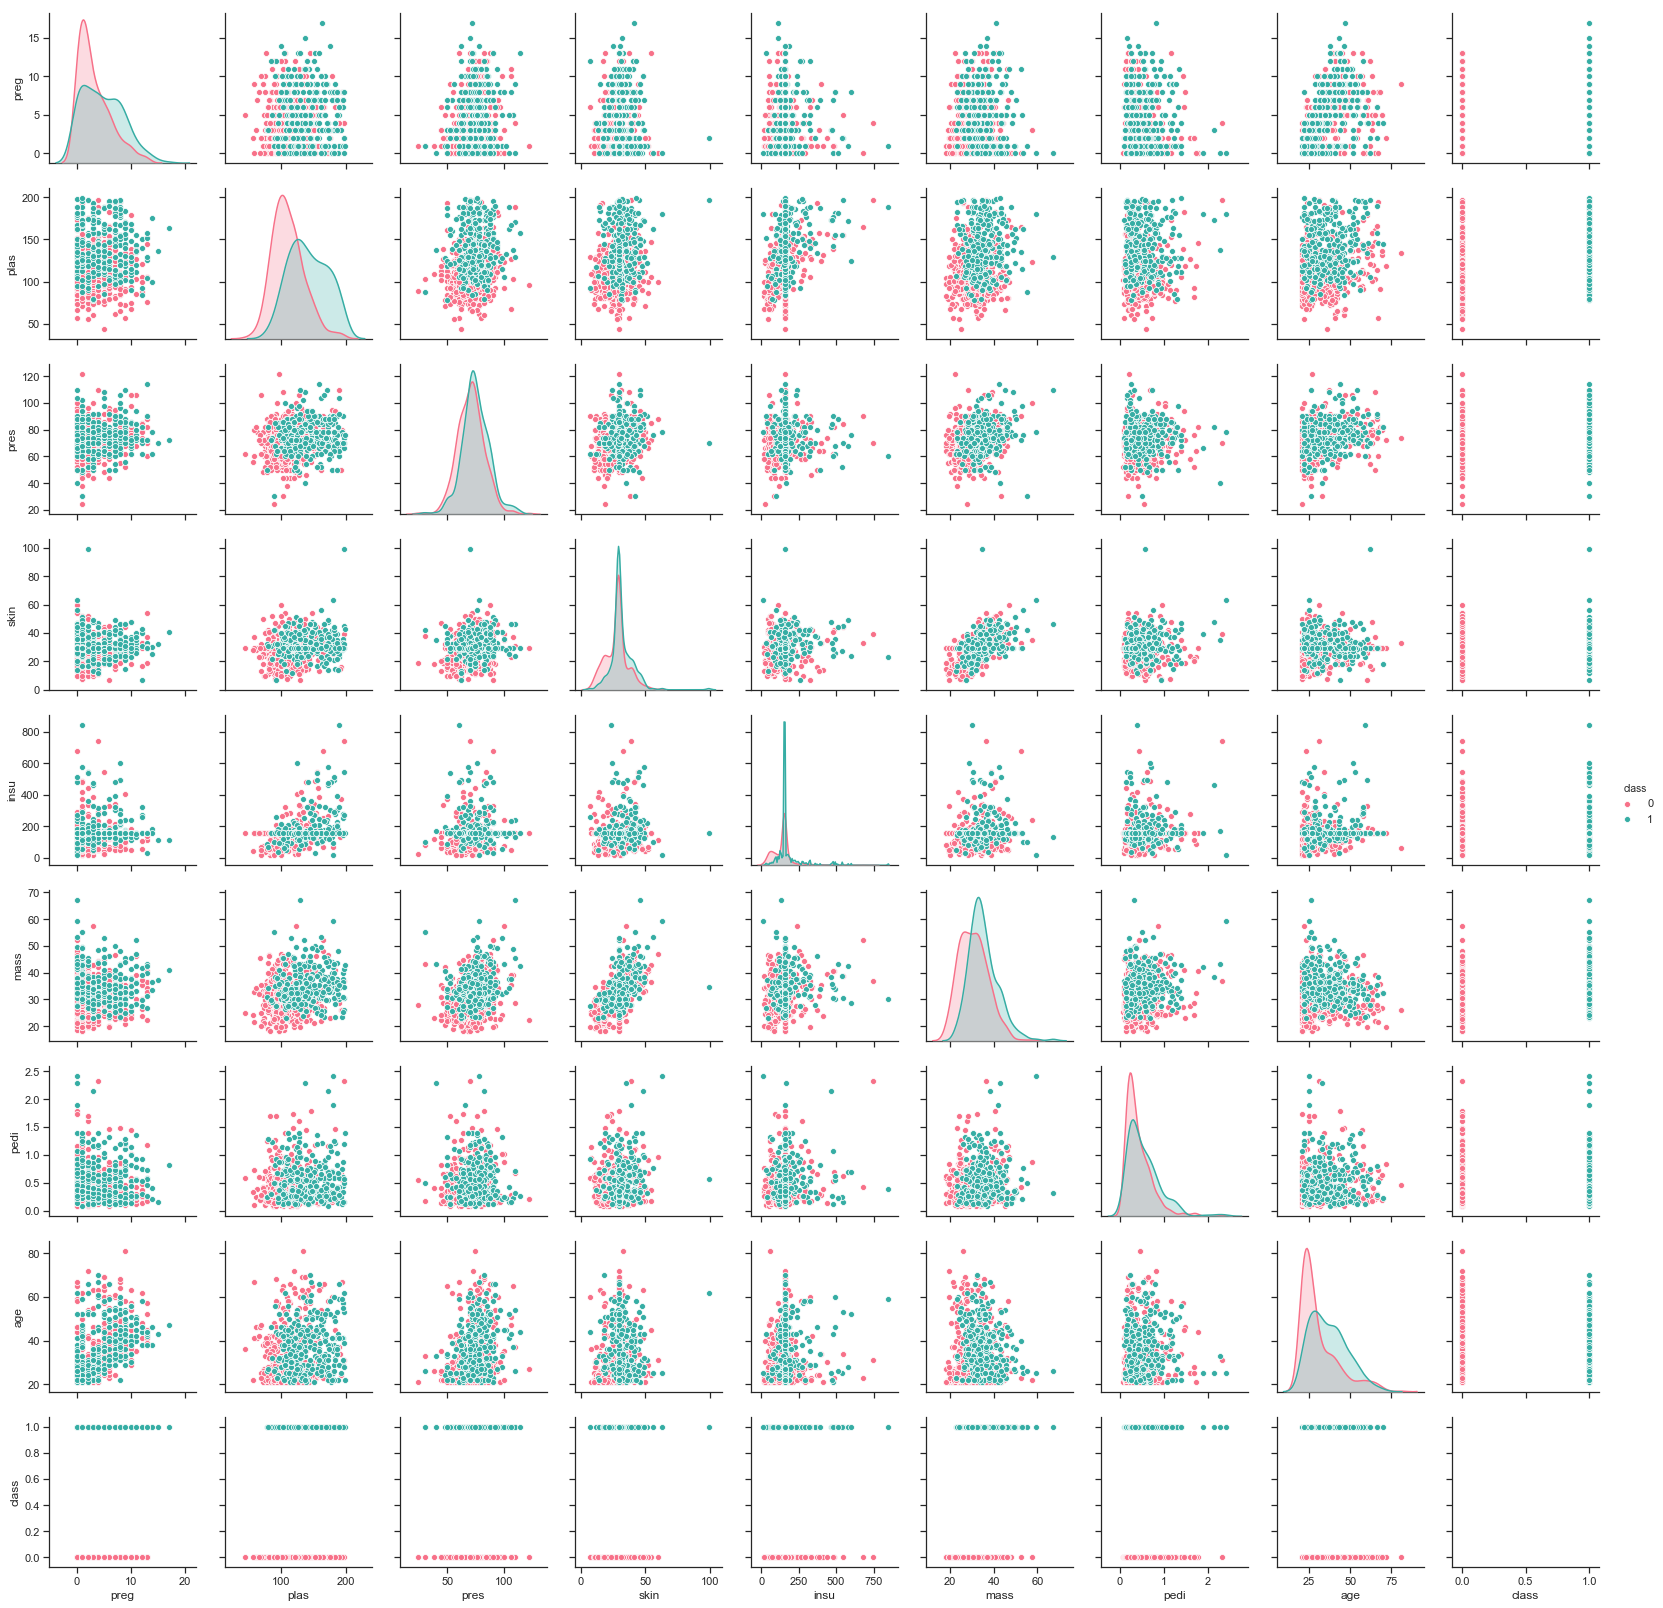

In [25]:
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'yellow', 'gold', 'orange', 'purple', 'brown', 'pink', 'green'])

g = sns.pairplot(Diabetes, hue='class', palette="husl")

